In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

In [2]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model  # 모델생성
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split # 데이터 분리

## 이진분류
```
1. 데이터셋 생성, 전처리
 엑셀에서 데이터 프레임으로 이후 ? 처리(df.replace('?',np.nan)) -> 결측치 처리
 -> x, y 분리  -> x변수 스케일 조정  -> train_test_split
 2. 모델생성(입력13, 출력1) & 학습과정 설정 & 학습
 3. 모델평가(그래프, 평가, 교차표)
```



## 분류분석
```
1. 데이터셋 생성, 전처리
 엑셀에서 데이터 프레임으로 이후 ? 처리 -> 결측치 처리(df.replace('?',np.nan))
 -> x, y 분리  -> x변수 스케일 조정  -> train_test_split
  2. 모델생성(입력13, 출력1) & 학습과정 설정 & 학습
 3. 모델평가(그래프, 평가, 교차표)
```

In [3]:
dataset = pd.read_excel
dataset = pd.read_excel('data/heart-disease.xlsx', comment='#')
dataset


,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,0,108,1,1.5,2,3,3,1
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


In [4]:
dataset.isin(['?']).any()

age             False
sex             False
cp              False
treshtbps       False
chol             True
fbs             False
restecg         False
thalach         False
exang           False
oldpeak         False
slope           False
ca               True
hsl              True
heartDisease    False
dtype: bool

In [5]:
dataset.replace('?',np.nan, inplace=True)
dataset.fillna(dataset.mean(), inplace=True)
dataset

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
0,63,1,1,145,233.000000,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286.000000,0,0,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,246.751656,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250.000000,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204.000000,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264.000000,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193.000000,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131.000000,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236.000000,0,2,174,0,0.0,2,1.000000,3.0,1


In [6]:
print(type(dataset)) 



<class 'pandas.core.frame.DataFrame'>


In [7]:

print(dataset.shape)

(303, 14)


In [9]:

x_train = dataset.iloc[:150, :-1]
y_train = dataset.iloc[:150, -1]

x_val = dataset.iloc[150:200, :-1]
y_val = dataset.iloc[150:200, -1]

x_test = dataset.iloc[200:, :-1]
y_test = dataset.iloc[200:, -1]


print(x_train.shape, y_train.shape)

x_train.shape, y_train.shape


(150, 13) (150,)


((150, 13), (150,))

In [10]:
from sklearn.preprocessing import MinMaxScaler


scaler_x = MinMaxScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_val_scaled   = scaler_x.transform(x_val)
x_test_scaled  = scaler_x.transform(x_test)



In [11]:
model = Sequential()
model.add(Input(shape=(13,)))              # 입력 13개
model.add(Dense(32, activation='relu'))    # 은닉층 1
model.add(Dense(16, activation='relu'))    # 은닉층 2
model.add(Dense(1, activation='sigmoid'))  # 출력층 1개 (이진 분류용
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [24]:
hist = model.fit(x_train_scaled, y_train,           # 훈련 데이터
                    validation_data=(x_val_scaled, y_val), # 검증 데이터
                    epochs=90,                         # 반복 횟수
                    batch_size=32,                     # 배치 크기
                    verbose=1)                         # 출력 모드


Epoch 1/90
5/5 [==============================] - 0s 18ms/step - loss: 0.2508 - accuracy: 0.9067 - val_loss: 0.5391 - val_accuracy: 0.8000
Epoch 2/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2495 - accuracy: 0.9067 - val_loss: 0.5417 - val_accuracy: 0.8200
Epoch 3/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2489 - accuracy: 0.9067 - val_loss: 0.5428 - val_accuracy: 0.8200
Epoch 4/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2478 - accuracy: 0.9133 - val_loss: 0.5421 - val_accuracy: 0.8000
Epoch 5/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2472 - accuracy: 0.9067 - val_loss: 0.5463 - val_accuracy: 0.8200
Epoch 6/90
5/5 [==============================] - 0s 10ms/step - loss: 0.2451 - accuracy: 0.9133 - val_loss: 0.5443 - val_accuracy: 0.8000
Epoch 7/90
5/5 [==============================] - 0s 9ms/step - loss: 0.2446 - accuracy: 0.9133 - val_loss: 0.5460 - val_accuracy: 0.8200
Epoch 8/90
5/5 [================

Epoch 60/90
5/5 [==============================] - 0s 9ms/step - loss: 0.1869 - accuracy: 0.9400 - val_loss: 0.5621 - val_accuracy: 0.8200
Epoch 61/90
5/5 [==============================] - 0s 10ms/step - loss: 0.1874 - accuracy: 0.9400 - val_loss: 0.5594 - val_accuracy: 0.8200
Epoch 62/90
5/5 [==============================] - 0s 10ms/step - loss: 0.1858 - accuracy: 0.9400 - val_loss: 0.5605 - val_accuracy: 0.8200
Epoch 63/90
5/5 [==============================] - 0s 10ms/step - loss: 0.1836 - accuracy: 0.9400 - val_loss: 0.5659 - val_accuracy: 0.8200
Epoch 64/90
5/5 [==============================] - 0s 9ms/step - loss: 0.1835 - accuracy: 0.9400 - val_loss: 0.5691 - val_accuracy: 0.8200
Epoch 65/90
5/5 [==============================] - 0s 9ms/step - loss: 0.1832 - accuracy: 0.9333 - val_loss: 0.5655 - val_accuracy: 0.8200
Epoch 66/90
5/5 [==============================] - 0s 8ms/step - loss: 0.1820 - accuracy: 0.9333 - val_loss: 0.5660 - val_accuracy: 0.8200
Epoch 67/90
5/5 [=======

In [25]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

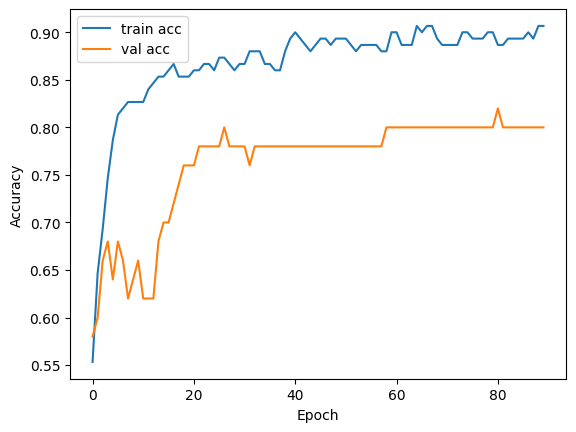

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


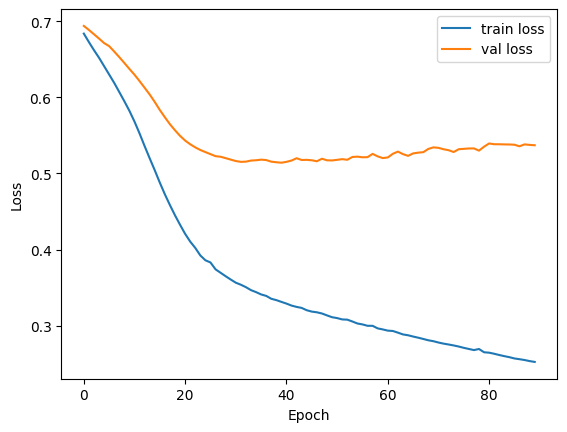

In [28]:


plt.plot(history.history['loss'], label='train loss')         # 훈련 손실
plt.plot(history.history['val_loss'], label='val loss')       # 검증 손실
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


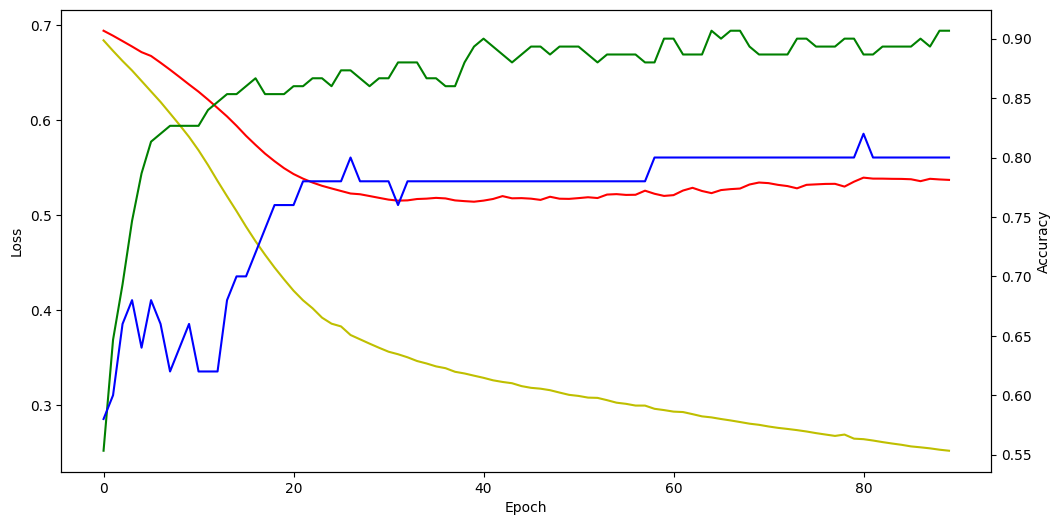

In [16]:
import matplotlib.pyplot as plt

# 하나의 Figure + 2개의 y축 (왼쪽: 손실, 오른쪽: 정확도)
fig, loss_ax = plt.subplots(figsize=(12, 6))

# 왼쪽 y축: Loss
loss_ax.plot(history.history['loss'], 'y', label='Train Loss')
loss_ax.plot(history.history['val_loss'], 'r', label='Val Loss')
loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')


# 오른쪽 y축: Accuracy
acc_ax = loss_ax.twinx()
acc_ax.plot(history.history['accuracy'], 'g', label='Train Acc')
acc_ax.plot(history.history['val_accuracy'], 'b', label='Val Acc')
acc_ax.set_ylabel('Accuracy')


plt.show()


In [17]:
# 예측 (확률값: 0.0 ~ 1.0)
y_hat = model.predict(x_test_scaled)

# 확률값을 이진 분류 결과로 변환 (0 또는 1)
y_hat = (y_hat >= 0.5).astype(float)

# 결과 확인
print(y_hat[:5])


4/4 [==============================] - 0s 2ms/step
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [18]:
y_test[:5]

200    0
201    0
202    0
203    0
204    0
Name: heartDisease, dtype: int64

In [19]:
TN = 0  # 0을 0으로 예측한 경우의 수(T)
FP = 0  # 0을 1로 예측한 경우의 수(F)
FN = 0  # 1을 0으로 예측한 경우의 수(F)
TP = 0  # 1을 1로 예측한 경우의 수(T)
print(y_test.shape, y_hat.shape)
for y, h in zip(y_test, y_hat.reshape(-1)):
    if y==0 and h==0:
        TN += 1
    elif y==0 and h==1:
        FP += 1
    elif y==1 and h==0:
        FN += 1
    else:
        TP += 1
print(TN, FP)
print(FN, TP)

(103,) (103, 1)
50 5
15 33


In [20]:
ctap = pd.crosstab(y_test, y_hat.reshape(-1))
ctap.index.name = '실제값'
ctap.columns.name='예측값'
ctap
pd.crosstab(y_test,
           y_hat.reshape(-1),
           rownames=['실제값'],
           colnames=['예측값'])

예측값,0.0,1.0
실제값,,
0,50,5
1,15,33


In [21]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,
                y_hat.reshape(-1))

array([[50,  5],
       [15, 33]], dtype=int64)

In [22]:
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,
                y_hat.reshape(-1))

array([[50,  5],
       [15, 33]], dtype=int64)

In [23]:
print('acc:',(TN+TP)/(TN+FP+FN+TP))
print('recall:',(TP)/(FN+TP))
print('precision:', (TP)/(FP+TP))

acc: 0.8058252427184466
recall: 0.6875
precision: 0.868421052631579
